In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_meta = "~/4_structural_clustering/foldseekCluster90_1E-5/foldseekCluster90_1E-5_meta.csv"
df_meta = pd.read_csv(file_meta)
#file_coverage = "../pdb_coverage/virus_proteins_ef_cf_coverage.csv"
file_coverage = "../structural_coverage/virus_records_ef_cf_plddt.csv"
df_coverage = pd.read_csv(file_coverage)

In [7]:
df_meta.columns

Index(['cluster_id', 'cluster_representative', 'structure_representative',
       'cluster_member', 'clustering_method', 'member_class',
       'member_record_id', 'protlen', 'plddt', 'ptm', 'ictv_sort',
       'ictv_species', 'genbank_name'],
      dtype='object')

In [11]:
df_meta[df_meta['plddt'] >= 70].shape[0] / df_meta.shape[0]

0.6410488245931284

In [ ]:
for index, row in df_meta.iterrows():
    
    member_class = row['member_class']
    record_id = row['member_record_id']

    if member_class == 'CF':
        df_meta.loc[index, 'pLDDT_0_50'] = df_coverage[df_coverage['header'] == record_id]['cf_pLDDT_0_50'].values[0]
        df_meta.loc[index, 'pLDDT_50_70'] = df_coverage[df_coverage['header'] == record_id]['cf_pLDDT_50_70'].values[0]
        df_meta.loc[index, 'pLDDT_70_90'] = df_coverage[df_coverage['header'] == record_id]['cf_pLDDT_70_90'].values[0]
        df_meta.loc[index, 'pLDDT_90_100'] = df_coverage[df_coverage['header'] == record_id]['cf_pLDDT_90_100'].values[0]
    elif member_class == 'EF':
        df_meta.loc[index, 'pLDDT_0_50'] = df_coverage[df_coverage['header'] == record_id]['ef_pLDDT_0_50'].values[0]
        df_meta.loc[index, 'pLDDT_50_70'] = df_coverage[df_coverage['header'] == record_id]['ef_pLDDT_50_70'].values[0]
        df_meta.loc[index, 'pLDDT_70_90'] = df_coverage[df_coverage['header'] == record_id]['ef_pLDDT_70_90'].values[0]
        df_meta.loc[index, 'pLDDT_90_100'] = df_coverage[df_coverage['header'] == record_id]['ef_pLDDT_90_100'].values[0]
    
    print(index, record_id)

In [18]:
df_meta.to_csv("./foldseekCluster90_1E-5_meta_pLDDT_coverage.csv", index=False)

In [21]:
file_meta = "./foldseekCluster90_1E-5_meta_pLDDT_coverage.csv"
df_meta = pd.read_csv(file_meta)

In [26]:
df_meta['protlen'].sum()

28119561

In [27]:
(df_meta['pLDDT_70_90'].sum() + df_meta['pLDDT_90_100'].sum()) / df_meta['protlen'].sum()

0.6511035147383702

In [28]:
df_meta['pLDDT_90_100'].sum() / df_meta['protlen'].sum()

0.3578518526658364

In [22]:
df_meta

,cluster_id,cluster_representative,structure_representative,cluster_member,clustering_method,member_class,member_record_id,protlen,plddt,ptm,ictv_sort,ictv_species,genbank_name,pLDDT_0_50,pLDDT_50_70,pLDDT_70_90,pLDDT_90_100
0,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,0.0,0.0,16.0,446.0
1,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ABK41188.1.11_10539_relaxed,mmseq,CF,ABK41188.1.11_10539,462,96.5,0.94,10539,Enterovirus B,3D,0.0,0.0,14.0,448.0
2,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ACZ67658.1.11_10757_relaxed,mmseq,CF,ACZ67658.1.11_10757,460,95.7,0.93,10757,Rhinovirus C,Polymerase,0.0,0.0,29.0,431.0
3,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AGH70290.1.11_10579_relaxed,mmseq,CF,AGH70290.1.11_10579,461,96.4,0.94,10579,Enterovirus C,3D,0.0,0.0,14.0,447.0
4,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AFQ62099.1.1.10_10580_relaxed,mmseq,CF,AFQ62099.1.1.10_10580,453,96.1,0.94,10580,Enterovirus C,RNA-dependent RNA polymerase (RdRp) in the Ent...,0.0,0.0,28.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85157,19063,CF-BAF45662.1_12759_relaxed,CF-BAF45662.1_12759_relaxed,CF-BAF45662.1_12759_relaxed,foldseek,CF,BAF45662.1_12759,128,94.0,0.52,12759,Ichnoviriform fugitivi,Product: polar residue rich protein-b13.1,0.0,5.0,13.0,110.0
85158,19064,CF-BAF45663.1_12759_relaxed,CF-BAF45663.1_12759_relaxed,CF-BAF45663.1_12759_relaxed,foldseek,CF,BAF45663.1_12759,116,53.3,0.23,12759,Ichnoviriform fugitivi,Product: b13.3,51.0,52.0,13.0,0.0
85159,19065,CF-BAF45664.1_12759_relaxed,CF-BAF45664.1_12759_relaxed,CF-BAF45664.1_12759_relaxed,foldseek,CF,BAF45664.1_12759,159,79.7,0.41,12759,Ichnoviriform fugitivi,Product: polar residue rich protein-b13.2,24.0,11.0,51.0,73.0
85160,19066,CF-BAF45668.1_12759_relaxed,CF-BAF45668.1_12759_relaxed,CF-BAF45668.1_12759_relaxed,foldseek,CF,BAF45668.1_12759,139,41.3,0.23,12759,Ichnoviriform fugitivi,Product: b16.1,109.0,14.0,16.0,0.0


In [2]:
file = "~/2_protein_structure_prediction/virosphere-fold-v1_predicted_dataset.csv"
df = pd.read_csv(file)

In [ ]:
# list of esm models outperforming colab models
df_meta = pd.read_csv("~/2_protein_structure_prediction/virosphere-fold-v1_predicted_dataset.csv")
df_esm = df[['record_id', 'Sort', 'Species', 'protlen', 'esmfold_log_pLDDT', 'colabfold_json_pLDDT', 'esm_colab_pLDDT_difference']].sort_values(by='esm_colab_pLDDT_difference', ascending=False).iloc[:50,:]
df_esm = df_esm.merge(df_meta[['record_id', 'genbank_name']], on='record_id', how='left')
df_esm.to_csv("top_50_esm_models_outperforming_colab.csv", index=False)

In [22]:
# make an empty dataframe with 5 columns (type, very_low, low, high, very_high)
df_plddt = pd.DataFrame(columns=['type', 'total', 'very_low', 'low', 'high', 'very_high'])

for fold in ['colabfold_json', 'esmfold_log']:
    
    total = df[df[f'{fold}_pLDDT'].notna()].shape[0]
    very_low = df[df[f'{fold}_pLDDT'] < 50].shape[0]
    low = df[(df[f'{fold}_pLDDT'] >= 50) & (df[f'{fold}_pLDDT'] < 70)].shape[0]
    high = df[(df[f'{fold}_pLDDT'] >= 70) & (df[f'{fold}_pLDDT'] < 90)].shape[0]
    very_high = df[df[f'{fold}_pLDDT'] >= 90].shape[0]

    new_row = pd.DataFrame([{'type': fold, 'total': total, 'very_low': very_low, 'low': low, 'high': high, 'very_high': very_high}])
    df_plddt = pd.concat([df_plddt, new_row], ignore_index=True)

In [19]:
df_plddt

,type,total,very_low,low,high,very_high,very_low_percentage,low_percentage,high_percentage,very_high_percentage
0,esmfold_log,84964,43124,21698,19071,1071,50.755614,76.293489,98.739466,100.0
1,colabfold_json,85162,9900,21680,41077,12505,11.624903,37.082267,85.316221,100.0


In [23]:
df_plddt['very_low_percentage'] = df_plddt['very_low'] / df_plddt['total'] * 100
df_plddt['low_percentage'] = (df_plddt['very_low'] + df_plddt['low']) / df_plddt['total'] * 100
df_plddt['high_percentage'] = (df_plddt['very_low'] + df_plddt['low'] + df_plddt['high']) / df_plddt['total'] * 100
df_plddt['very_high_percentage'] = (df_plddt['very_low'] + df_plddt['low'] + df_plddt['high'] + df_plddt['very_high']) / df_plddt['total'] * 100

<function matplotlib.pyplot.show(close=None, block=None)>

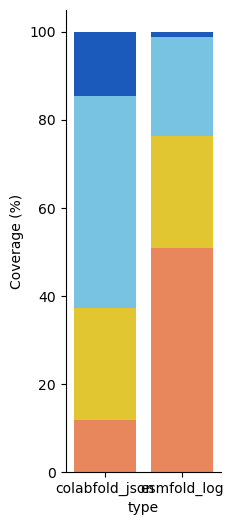

In [27]:
# change figure size
plt.figure(figsize=(2, 6))
sns.barplot(df_plddt, x="type", y="very_high_percentage", color='#0053d6', alpha=1)
sns.barplot(df_plddt, x="type", y="high_percentage", color='#65cbf3', alpha=1)
sns.barplot(df_plddt, x="type", y="low_percentage", color='#ffdb13', alpha=1)
sns.barplot(df_plddt, x="type", y="very_low_percentage", color='#ff7d45', alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("Coverage (%)")
#plt.xlabel("Functional coverage")
plt.savefig(f"colabfold_esmfold_percentage_of_structures_with_mean_plddt_scores.svg", format="svg")
plt.show

In [28]:
file_coverage = "../pdb_coverage/virus_proteins_ef_cf_coverage.csv"
df_coverage = pd.read_csv(file_coverage)

In [29]:
df_coverage

,header,protein_id,Sort,pept_cat,protlen,ef_coverage,ef_plddt_0_50,ef_plddt_50_70,ef_plddt_70_90,ef_plddt_90_100,cf_coverage,cf_plddt_0_50,cf_plddt_50_70,cf_plddt_70_90,cf_plddt_90_100
0,CAA52564.1_4563,CAA52564.1,4563,protein,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AIW68525.1_11911,AIW68525.1,11911,protein,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AIW68499.1_11911,AIW68499.1,11911,protein,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AOO54533.1_11976,AOO54533.1,11976,protein,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA67112.1_4989,AAA67112.1,4989,protein,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71269,ASO76148.1_10247,ASO76148.1,10247,protein,7861,1488.0,388.0,299.0,660.0,141.0,1488.0,26.0,122.0,464.0,876.0
71270,QRC47047.1_10244,QRC47047.1,10244,protein,8043,1357.0,192.0,305.0,693.0,167.0,1357.0,20.0,108.0,395.0,834.0
71271,AIJ50565.1_10246,AIJ50565.1,10246,protein,8108,2219.0,519.0,756.0,761.0,183.0,2219.0,606.0,219.0,455.0,939.0
71272,QRC47039.1_10254,QRC47039.1,10254,protein,8927,1392.0,173.0,184.0,686.0,349.0,1392.0,35.0,102.0,434.0,821.0


In [30]:
df_coverage['ef_coverage'].sum()

27030348.0

In [31]:
# make an empty dataframe with 5 columns (type, very_low, low, high, very_high)
df_plddt = pd.DataFrame(columns=['type', 'total', 'very_low', 'low', 'high', 'very_high'])

for fold in ['cf', 'ef']:
    
    total = df_coverage[f'{fold}_coverage'].sum()
    very_low = df_coverage[f'{fold}_plddt_0_50'].sum()
    low = df_coverage[f'{fold}_plddt_50_70'].sum()
    high = df_coverage[f'{fold}_plddt_70_90'].sum()
    very_high = df_coverage[f'{fold}_plddt_90_100'].sum()

    new_row = pd.DataFrame([{'type': fold, 'total': total, 'very_low': very_low, 'low': low, 'high': high, 'very_high': very_high}])
    df_plddt = pd.concat([df_plddt, new_row], ignore_index=True)

/tmp/ipykernel_3009962/1960077960.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_plddt = pd.concat([df_plddt, new_row], ignore_index=True)


In [33]:
df_plddt['very_low_percentage'] = df_plddt['very_low'] / df_plddt['total'] * 100
df_plddt['low_percentage'] = (df_plddt['very_low'] + df_plddt['low']) / df_plddt['total'] * 100
df_plddt['high_percentage'] = (df_plddt['very_low'] + df_plddt['low'] + df_plddt['high']) / df_plddt['total'] * 100
df_plddt['very_high_percentage'] = (df_plddt['very_low'] + df_plddt['low'] + df_plddt['high'] + df_plddt['very_high']) / df_plddt['total'] * 100

In [34]:
df_plddt

,type,total,very_low,low,high,very_high,very_low_percentage,low_percentage,high_percentage,very_high_percentage
0,cf,27234064.0,6340023.0,3642144.0,7793294.0,9458603.0,23.279754,36.653241,65.269219,100.000000
1,ef,27030348.0,14236045.0,4261264.0,5392093.0,3139875.0,52.666895,68.431635,88.379928,99.996038


<function matplotlib.pyplot.show(close=None, block=None)>

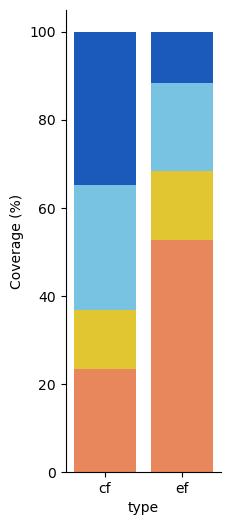

In [36]:
# change figure size
plt.figure(figsize=(2, 6))
sns.barplot(df_plddt, x="type", y="very_high_percentage", color='#0053d6', alpha=1)
sns.barplot(df_plddt, x="type", y="high_percentage", color='#65cbf3', alpha=1)
sns.barplot(df_plddt, x="type", y="low_percentage", color='#ffdb13', alpha=1)
sns.barplot(df_plddt, x="type", y="very_low_percentage", color='#ff7d45', alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("Coverage (%)")
#plt.xlabel("Functional coverage")
plt.savefig(f"colabfold_esmfold_percentage_of_residues_with_plddt_scores.svg", format="svg")
plt.show

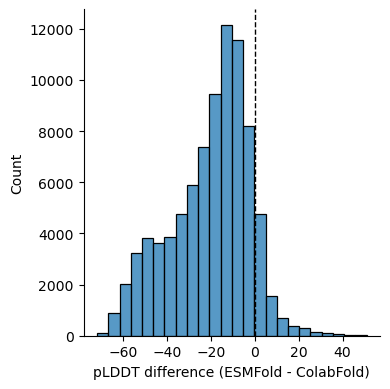

In [40]:
#plt.figure(figsize=(2, 4))

sns.displot(df['esm_colab_pLDDT_difference'], bins=24, height=4, aspect=1)

plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.ylabel('Count', fontsize=10)
plt.xlabel('pLDDT difference (ESMFold - ColabFold)', fontsize=10)

plt.savefig("./esm_colab_plddt_difference_histogram_small.svg", format='svg')

plt.show()